In [27]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def transform_xls_to_csv(filename: str, new_filename: str) -> None:
    # Read and store content of an excel file 
    read_file = pd.read_excel (filename)
    # Write the dataframe object into csv file
    read_file.to_csv (new_filename, index = None, header=True)

In [11]:
custom_dtype = {'id': str,                        
                'pocket':str,
                'product':str,
                'status':str,
                'option':str,
                'guest_id':str,
                'booking_fees':float,
                'amount':float,
                'total_amount':float,
                'discount':float,
                'creation_date_hour':str,
                'beginning_date_hour':str,
                'begining_slice':str,
                'end_date_hour':str,
                'max_date_hour':str,
                'cxl_date_hour':str,
                'los':str,
                'lead_time_hours':float,
                'entry_date_hour':str,
                'exit_date_hour':str,
                'promo_code':str,
                'amount_promo':str}

In [12]:
df = pd.read_csv("../raw_data/bookings_without_onepark.csv", 
                 dtype=custom_dtype, 
                 parse_dates=['creation_date_hour','beginning_date_hour', 'end_date_hour'])

In [17]:
# Check for types
print(df.dtypes)

id                             object
pocket                         object
product                        object
status                         object
option                         object
guest_id                       object
booking_fees                  float64
amount                        float64
total_amount                  float64
discount                      float64
creation_date_hour     datetime64[ns]
beginning_date_hour    datetime64[ns]
begining_slice                 object
end_date_hour          datetime64[ns]
max_date_hour                  object
cxl_date_hour                  object
los                            object
lead_time_hours               float64
entry_date_hour                object
exit_date_hour                 object
promo_code                     object
amount_promo                   object
dtype: object


In [15]:
# Check for nan values
df = df.fillna('unknown')
df.isin(['unknown']).sum()

id                          0
pocket                      0
product                     0
status                      0
option                      0
guest_id                10103
booking_fees                0
amount                      0
total_amount                0
discount                    0
creation_date_hour          0
beginning_date_hour         0
begining_slice              0
end_date_hour               0
max_date_hour          265110
cxl_date_hour          489786
los                         0
lead_time_hours             0
entry_date_hour        536042
exit_date_hour         536042
promo_code             481949
amount_promo           481946
dtype: int64

In [29]:
# Compute Z scores 
df['z_score_booking_fees'] = zscore(df['booking_fees'])
df['z_score_amount'] = zscore(df['amount'])
df['z_score_total_amount'] = zscore(df['total_amount'])
df['z_score_discount'] = zscore(df['discount'])

# Find outliers
outliers = df[abs(df['z_score_booking_fees']) > 3]

print(outliers)
print(len(outliers))

              id      pocket product     status   option    guest_id  \
32564    5497261  0000100435     H10   finished  premium  DCL0051721   
32741    5498845  0000100435     H10   finished  premium  DCL0382375   
33060    5501611  0000100435     H10   finished  premium  DCL0382118   
33066    5501688  0000100435     H10   finished  premium  DCL0382764   
33436    5505401  0000100435     H10   finished  premium  DCL0313253   
...          ...         ...     ...        ...      ...         ...   
535771  10273459  0000000025    F398  completed  premium  DCL0880274   
535811  10273802  0000000025     H10  completed  premium  DCL0682660   
536018  10275752  0000100435    F398  completed  premium  DCL0097916   
536043  10275903  0000100435    F398  completed  premium  DCL0248992   
536081  10276221  0000000025     H10  completed  premium  DCL0887448   

        booking_fees  amount  total_amount  discount  ...          los  \
32564            9.0    14.9          23.9       0.0  ...  06

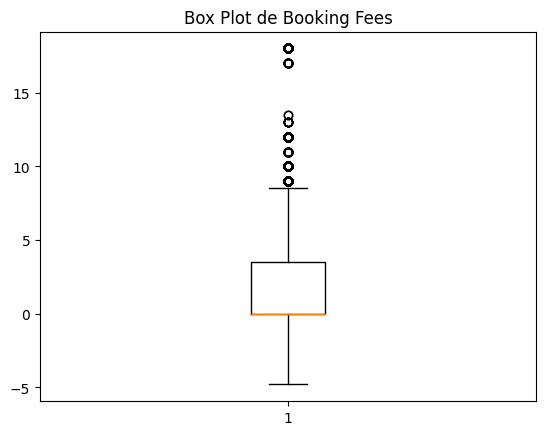

In [30]:
plt.figure()
plt.boxplot(df['booking_fees'].dropna())
plt.title('Box Plot de Booking Fees')
plt.show()

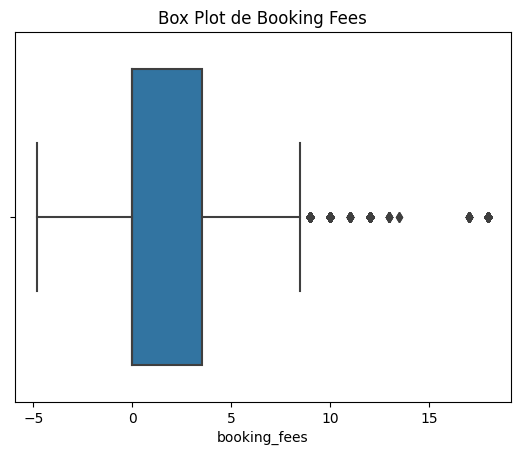

In [28]:
sns.boxplot(x=df['booking_fees'])
plt.title('Box Plot de Booking Fees')
plt.show()